In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Spades"
model = "nn"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Spades
0,0,0,0,0,0,0,0,1,2001-01-01 00:00:00.006820,A
1,0,0,0,1,0,0,0,0,2001-01-01 00:00:00.006821,10
2,0,0,0,0,1,0,0,0,2001-01-01 00:00:00.006822,J
3,0,0,0,0,1,0,0,0,2001-01-01 00:00:00.006823,J
4,0,0,0,0,0,0,1,0,2001-02-01 00:00:00.006824,K


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Spades,id
29119,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,9,1
29120,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,8,1
29121,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,8,1
29122,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,10,1
29123,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,9,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:02<01:50,  2.83s/it]

Rolling:   8%|▊         | 3/40 [00:02<00:28,  1.30it/s]

Rolling:  15%|█▌        | 6/40 [00:04<00:17,  1.90it/s]

Rolling:  18%|█▊        | 7/40 [00:04<00:16,  2.05it/s]

Rolling:  20%|██        | 8/40 [00:04<00:14,  2.28it/s]

Rolling:  22%|██▎       | 9/40 [00:04<00:12,  2.47it/s]

Rolling:  25%|██▌       | 10/40 [00:05<00:11,  2.59it/s]

Rolling:  28%|██▊       | 11/40 [00:05<00:10,  2.66it/s]

Rolling:  30%|███       | 12/40 [00:05<00:08,  3.13it/s]

Rolling:  32%|███▎      | 13/40 [00:06<00:09,  2.96it/s]

Rolling:  35%|███▌      | 14/40 [00:06<00:09,  2.80it/s]

Rolling:  38%|███▊      | 15/40 [00:06<00:07,  3.30it/s]

Rolling:  40%|████      | 16/40 [00:06<00:06,  3.75it/s]

Rolling:  42%|████▎     | 17/40 [00:07<00:07,  3.10it/s]

Rolling:  45%|████▌     | 18/40 [00:07<00:06,  3.56it/s]

Rolling:  48%|████▊     | 19/40 [00:07<00:05,  3.98it/s]

Rolling:  50%|█████     | 20/40 [00:08<00:06,  3.02it/s]

Rolling:  52%|█████▎    | 21/40 [00:08<00:05,  3.49it/s]

Rolling:  55%|█████▌    | 22/40 [00:08<00:04,  3.91it/s]

Rolling:  57%|█████▊    | 23/40 [00:08<00:04,  4.13it/s]

Rolling:  60%|██████    | 24/40 [00:09<00:05,  2.85it/s]

Rolling:  62%|██████▎   | 25/40 [00:09<00:04,  3.35it/s]

Rolling:  65%|██████▌   | 26/40 [00:09<00:03,  3.79it/s]

Rolling:  68%|██████▊   | 27/40 [00:10<00:03,  4.19it/s]

Rolling:  70%|███████   | 28/40 [00:10<00:04,  2.66it/s]

Rolling:  72%|███████▎  | 29/40 [00:10<00:03,  3.14it/s]

Rolling:  75%|███████▌  | 30/40 [00:11<00:02,  3.60it/s]

Rolling:  78%|███████▊  | 31/40 [00:11<00:02,  4.06it/s]

Rolling:  80%|████████  | 32/40 [00:11<00:01,  4.41it/s]

Rolling:  82%|████████▎ | 33/40 [00:11<00:01,  4.55it/s]

Rolling:  85%|████████▌ | 34/40 [00:12<00:02,  2.57it/s]

Rolling:  88%|████████▊ | 35/40 [00:12<00:01,  3.14it/s]

Rolling:  90%|█████████ | 36/40 [00:12<00:01,  3.71it/s]

Rolling:  92%|█████████▎| 37/40 [00:12<00:00,  4.28it/s]

Rolling:  95%|█████████▌| 38/40 [00:13<00:00,  4.79it/s]

Rolling:  98%|█████████▊| 39/40 [00:13<00:00,  5.20it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  5.73it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:04<03:03,  4.70s/it]

Rolling:   5%|▌         | 2/40 [00:05<01:37,  2.56s/it]

Rolling:   8%|▊         | 3/40 [00:07<01:22,  2.24s/it]

Rolling:  10%|█         | 4/40 [00:08<00:57,  1.59s/it]

Rolling:  12%|█▎        | 5/40 [00:10<00:58,  1.67s/it]

Rolling:  15%|█▌        | 6/40 [00:10<00:44,  1.32s/it]

Rolling:  18%|█▊        | 7/40 [00:11<00:35,  1.08s/it]

Rolling:  20%|██        | 8/40 [00:11<00:30,  1.07it/s]

Rolling:  22%|██▎       | 9/40 [00:13<00:36,  1.17s/it]

Rolling:  25%|██▌       | 10/40 [00:14<00:30,  1.00s/it]

Rolling:  28%|██▊       | 11/40 [00:14<00:25,  1.14it/s]

Rolling:  30%|███       | 12/40 [00:15<00:22,  1.26it/s]

Rolling:  32%|███▎      | 13/40 [00:17<00:31,  1.15s/it]

Rolling:  35%|███▌      | 14/40 [00:17<00:25,  1.02it/s]

Rolling:  38%|███▊      | 15/40 [00:18<00:21,  1.15it/s]

Rolling:  40%|████      | 16/40 [00:19<00:18,  1.27it/s]

Rolling:  42%|████▎     | 17/40 [00:19<00:16,  1.38it/s]

Rolling:  45%|████▌     | 18/40 [00:22<00:26,  1.22s/it]

Rolling:  48%|████▊     | 19/40 [00:22<00:21,  1.04s/it]

Rolling:  50%|█████     | 20/40 [00:23<00:17,  1.11it/s]

Rolling:  52%|█████▎    | 21/40 [00:23<00:15,  1.26it/s]

Rolling:  55%|█████▌    | 22/40 [00:24<00:13,  1.36it/s]

Rolling:  57%|█████▊    | 23/40 [00:25<00:11,  1.45it/s]

Rolling:  60%|██████    | 24/40 [00:25<00:10,  1.50it/s]

Rolling:  62%|██████▎   | 25/40 [00:28<00:20,  1.36s/it]

Rolling:  65%|██████▌   | 26/40 [00:29<00:15,  1.13s/it]

Rolling:  68%|██████▊   | 27/40 [00:29<00:12,  1.05it/s]

Rolling:  70%|███████   | 28/40 [00:30<00:10,  1.19it/s]

Rolling:  72%|███████▎  | 29/40 [00:30<00:08,  1.30it/s]

Rolling:  75%|███████▌  | 30/40 [00:31<00:07,  1.41it/s]

Rolling:  78%|███████▊  | 31/40 [00:32<00:06,  1.47it/s]

Rolling:  80%|████████  | 32/40 [00:32<00:05,  1.48it/s]

Rolling:  82%|████████▎ | 33/40 [00:33<00:04,  1.51it/s]

Rolling:  85%|████████▌ | 34/40 [00:36<00:08,  1.42s/it]

Rolling:  88%|████████▊ | 35/40 [00:37<00:05,  1.14s/it]

Rolling:  90%|█████████ | 36/40 [00:37<00:03,  1.04it/s]

Rolling:  92%|█████████▎| 37/40 [00:38<00:02,  1.22it/s]

Rolling:  95%|█████████▌| 38/40 [00:38<00:01,  1.39it/s]

Rolling:  98%|█████████▊| 39/40 [00:39<00:00,  1.53it/s]

Rolling: 100%|██████████| 40/40 [00:39<00:00,  1.72it/s]

Rolling: 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]

,0,1,2,3,4,5,6,7,Date,Spades,id
33509995,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,9,"(1, 2017-12-07 00:00:00.035928)"
33509996,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,8,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,8,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,10,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,9,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Spades
29124,35944,J
29125,35945,Q
29126,35946,K
29127,35947,9
29128,35948,K


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 9600)              0         


 dense (Dense)               (None, 350)               3360350   


 dense_1 (Dense)             (None, 250)               87750     


 dense_2 (Dense)             (None, 150)               37650     


 dense_3 (Dense)             (None, 8)                 1208      


Total params: 3,486,958


Trainable params: 3,486,958


Non-trainable params: 0


_________________________________________________________________


2022-08-12 22:11:50.511691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 2:58 - loss: 2.1149 - accuracy: 0.1250

  6/437 [..............................] - ETA: 5s - loss: 2.1529 - accuracy: 0.1120  

 11/437 [..............................] - ETA: 4s - loss: 2.1416 - accuracy: 0.1236

 15/437 [>.............................] - ETA: 5s - loss: 2.1346 - accuracy: 0.1302

 20/437 [>.............................] - ETA: 5s - loss: 2.1291 - accuracy: 0.1352

 25/437 [>.............................] - ETA: 4s - loss: 2.1307 - accuracy: 0.1250

 30/437 [=>............................] - ETA: 4s - loss: 2.1213 - accuracy: 0.1297

 35/437 [=>............................] - ETA: 4s - loss: 2.1210 - accuracy: 0.1268

 40/437 [=>............................] - ETA: 4s - loss: 2.1206 - accuracy: 0.1262

 45/437 [==>...........................] - ETA: 4s - loss: 2.1198 - accuracy: 0.1229

 50/437 [==>...........................] - ETA: 4s - loss: 2.1176 - accuracy: 0.1275

 55/437 [==>...........................] - ETA: 4s - loss: 2.1172 - accuracy: 0.1276

 60/437 [===>..........................] - ETA: 4s - loss: 2.1154 - accuracy: 0.1263

 65/437 [===>..........................] - ETA: 4s - loss: 2.1138 - accuracy: 0.1243

 70/437 [===>..........................] - ETA: 4s - loss: 2.1120 - accuracy: 0.1237

 75/437 [====>.........................] - ETA: 4s - loss: 2.1115 - accuracy: 0.1240

 80/437 [====>.........................] - ETA: 4s - loss: 2.1100 - accuracy: 0.1242

 85/437 [====>.........................] - ETA: 4s - loss: 2.1087 - accuracy: 0.1254

 90/437 [=====>........................] - ETA: 3s - loss: 2.1073 - accuracy: 0.1243

 95/437 [=====>........................] - ETA: 3s - loss: 2.1066 - accuracy: 0.1255

100/437 [=====>........................] - ETA: 3s - loss: 2.1059 - accuracy: 0.1248

105/437 [======>.......................] - ETA: 3s - loss: 2.1058 - accuracy: 0.1251

110/437 [======>.......................] - ETA: 3s - loss: 2.1061 - accuracy: 0.1246

115/437 [======>.......................] - ETA: 3s - loss: 2.1053 - accuracy: 0.1250

120/437 [=======>......................] - ETA: 3s - loss: 2.1042 - accuracy: 0.1259

125/437 [=======>......................] - ETA: 3s - loss: 2.1038 - accuracy: 0.1248

130/437 [=======>......................] - ETA: 3s - loss: 2.1036 - accuracy: 0.1243

135/437 [========>.....................] - ETA: 3s - loss: 2.1036 - accuracy: 0.1231

140/437 [========>.....................] - ETA: 3s - loss: 2.1028 - accuracy: 0.1233

145/437 [========>.....................] - ETA: 3s - loss: 2.1022 - accuracy: 0.1240

150/437 [=========>....................] - ETA: 3s - loss: 2.1017 - accuracy: 0.1244

155/437 [=========>....................] - ETA: 3s - loss: 2.1010 - accuracy: 0.1246

160/437 [=========>....................] - ETA: 3s - loss: 2.1004 - accuracy: 0.1240

165/437 [==========>...................] - ETA: 3s - loss: 2.1000 - accuracy: 0.1235

170/437 [==========>...................] - ETA: 3s - loss: 2.0998 - accuracy: 0.1233

175/437 [===========>..................] - ETA: 2s - loss: 2.0994 - accuracy: 0.1229

180/437 [===========>..................] - ETA: 2s - loss: 2.0988 - accuracy: 0.1234

185/437 [===========>..................] - ETA: 2s - loss: 2.0983 - accuracy: 0.1236

190/437 [============>.................] - ETA: 2s - loss: 2.0982 - accuracy: 0.1234

195/437 [============>.................] - ETA: 2s - loss: 2.0980 - accuracy: 0.1238

200/437 [============>.................] - ETA: 2s - loss: 2.0975 - accuracy: 0.1250

205/437 [=============>................] - ETA: 2s - loss: 2.0971 - accuracy: 0.1255

210/437 [=============>................] - ETA: 2s - loss: 2.0970 - accuracy: 0.1254

215/437 [=============>................] - ETA: 2s - loss: 2.0967 - accuracy: 0.1251

220/437 [==============>...............] - ETA: 2s - loss: 2.0965 - accuracy: 0.1254

225/437 [==============>...............] - ETA: 2s - loss: 2.0964 - accuracy: 0.1252

229/437 [==============>...............] - ETA: 2s - loss: 2.0960 - accuracy: 0.1252

234/437 [===============>..............] - ETA: 2s - loss: 2.0957 - accuracy: 0.1250

239/437 [===============>..............] - ETA: 2s - loss: 2.0954 - accuracy: 0.1257

244/437 [===============>..............] - ETA: 2s - loss: 2.0951 - accuracy: 0.1253

249/437 [================>.............] - ETA: 2s - loss: 2.0948 - accuracy: 0.1253

254/437 [================>.............] - ETA: 2s - loss: 2.0945 - accuracy: 0.1248

259/437 [================>.............] - ETA: 2s - loss: 2.0943 - accuracy: 0.1247

264/437 [=================>............] - ETA: 1s - loss: 2.0940 - accuracy: 0.1248

269/437 [=================>............] - ETA: 1s - loss: 2.0938 - accuracy: 0.1248

274/437 [=================>............] - ETA: 1s - loss: 2.0935 - accuracy: 0.1249

279/437 [==================>...........] - ETA: 1s - loss: 2.0933 - accuracy: 0.1254

284/437 [==================>...........] - ETA: 1s - loss: 2.0931 - accuracy: 0.1252

289/437 [==================>...........] - ETA: 1s - loss: 2.0929 - accuracy: 0.1252

294/437 [===================>..........] - ETA: 1s - loss: 2.0926 - accuracy: 0.1252

299/437 [===================>..........] - ETA: 1s - loss: 2.0924 - accuracy: 0.1253

304/437 [===================>..........] - ETA: 1s - loss: 2.0923 - accuracy: 0.1253

309/437 [====================>.........] - ETA: 1s - loss: 2.0922 - accuracy: 0.1251

313/437 [====================>.........] - ETA: 1s - loss: 2.0920 - accuracy: 0.1253

318/437 [====================>.........] - ETA: 1s - loss: 2.0919 - accuracy: 0.1249

323/437 [=====================>........] - ETA: 1s - loss: 2.0918 - accuracy: 0.1249

328/437 [=====================>........] - ETA: 1s - loss: 2.0916 - accuracy: 0.1248

333/437 [=====================>........] - ETA: 1s - loss: 2.0914 - accuracy: 0.1253

338/437 [======================>.......] - ETA: 1s - loss: 2.0913 - accuracy: 0.1255

343/437 [======================>.......] - ETA: 1s - loss: 2.0912 - accuracy: 0.1251

348/437 [======================>.......] - ETA: 1s - loss: 2.0910 - accuracy: 0.1251

353/437 [=======================>......] - ETA: 0s - loss: 2.0909 - accuracy: 0.1250

358/437 [=======================>......] - ETA: 0s - loss: 2.0907 - accuracy: 0.1249

363/437 [=======================>......] - ETA: 0s - loss: 2.0906 - accuracy: 0.1245

368/437 [========================>.....] - ETA: 0s - loss: 2.0905 - accuracy: 0.1245

373/437 [========================>.....] - ETA: 0s - loss: 2.0904 - accuracy: 0.1243

378/437 [========================>.....] - ETA: 0s - loss: 2.0902 - accuracy: 0.1241

383/437 [=========================>....] - ETA: 0s - loss: 2.0900 - accuracy: 0.1245

388/437 [=========================>....] - ETA: 0s - loss: 2.0899 - accuracy: 0.1243

393/437 [=========================>....] - ETA: 0s - loss: 2.0898 - accuracy: 0.1245

398/437 [==========================>...] - ETA: 0s - loss: 2.0898 - accuracy: 0.1245

403/437 [==========================>...] - ETA: 0s - loss: 2.0896 - accuracy: 0.1247

408/437 [===========================>..] - ETA: 0s - loss: 2.0895 - accuracy: 0.1251

413/437 [===========================>..] - ETA: 0s - loss: 2.0894 - accuracy: 0.1252

418/437 [===========================>..] - ETA: 0s - loss: 2.0893 - accuracy: 0.1251

423/437 [============================>.] - ETA: 0s - loss: 2.0892 - accuracy: 0.1251

428/437 [============================>.] - ETA: 0s - loss: 2.0891 - accuracy: 0.1250

433/437 [============================>.] - ETA: 0s - loss: 2.0890 - accuracy: 0.1251

437/437 [==============================] - 6s 13ms/step - loss: 2.0889 - accuracy: 0.1254 - val_loss: 2.0796 - val_accuracy: 0.1185


Epoch 2/300


  1/437 [..............................] - ETA: 4s - loss: 2.0793 - accuracy: 0.1719

  6/437 [..............................] - ETA: 4s - loss: 2.0791 - accuracy: 0.1510

 11/437 [..............................] - ETA: 4s - loss: 2.0787 - accuracy: 0.1477

 15/437 [>.............................] - ETA: 4s - loss: 2.0785 - accuracy: 0.1448

 20/437 [>.............................] - ETA: 4s - loss: 2.0782 - accuracy: 0.1469

 25/437 [>.............................] - ETA: 4s - loss: 2.0783 - accuracy: 0.1437

 29/437 [>.............................] - ETA: 4s - loss: 2.0785 - accuracy: 0.1406

 34/437 [=>............................] - ETA: 4s - loss: 2.0784 - accuracy: 0.1434

 39/437 [=>............................] - ETA: 4s - loss: 2.0783 - accuracy: 0.1398

 44/437 [==>...........................] - ETA: 4s - loss: 2.0779 - accuracy: 0.1403

 49/437 [==>...........................] - ETA: 4s - loss: 2.0792 - accuracy: 0.1387

 54/437 [==>...........................] - ETA: 4s - loss: 2.0792 - accuracy: 0.1383

 59/437 [===>..........................] - ETA: 4s - loss: 2.0795 - accuracy: 0.1367

 64/437 [===>..........................] - ETA: 4s - loss: 2.0817 - accuracy: 0.1360

 69/437 [===>..........................] - ETA: 4s - loss: 2.0818 - accuracy: 0.1375

 74/437 [====>.........................] - ETA: 4s - loss: 2.0811 - accuracy: 0.1385

 79/437 [====>.........................] - ETA: 3s - loss: 2.0810 - accuracy: 0.1371

 84/437 [====>.........................] - ETA: 3s - loss: 2.0807 - accuracy: 0.1371

 89/437 [=====>........................] - ETA: 3s - loss: 2.0804 - accuracy: 0.1366

 94/437 [=====>........................] - ETA: 3s - loss: 2.0805 - accuracy: 0.1373

 99/437 [=====>........................] - ETA: 3s - loss: 2.0808 - accuracy: 0.1378

104/437 [======>.......................] - ETA: 3s - loss: 2.0809 - accuracy: 0.1381

109/437 [======>.......................] - ETA: 3s - loss: 2.0810 - accuracy: 0.1378

114/437 [======>.......................] - ETA: 3s - loss: 2.0813 - accuracy: 0.1377

119/437 [=======>......................] - ETA: 3s - loss: 2.0813 - accuracy: 0.1372

124/437 [=======>......................] - ETA: 3s - loss: 2.0815 - accuracy: 0.1371

129/437 [=======>......................] - ETA: 3s - loss: 2.0813 - accuracy: 0.1375

134/437 [========>.....................] - ETA: 3s - loss: 2.0812 - accuracy: 0.1382

139/437 [========>.....................] - ETA: 3s - loss: 2.0813 - accuracy: 0.1383

144/437 [========>.....................] - ETA: 3s - loss: 2.0815 - accuracy: 0.1379

149/437 [=========>....................] - ETA: 3s - loss: 2.0818 - accuracy: 0.1385

154/437 [=========>....................] - ETA: 3s - loss: 2.0820 - accuracy: 0.1378

159/437 [=========>....................] - ETA: 3s - loss: 2.0818 - accuracy: 0.1381

164/437 [==========>...................] - ETA: 3s - loss: 2.0819 - accuracy: 0.1387

169/437 [==========>...................] - ETA: 2s - loss: 2.0821 - accuracy: 0.1383

174/437 [==========>...................] - ETA: 2s - loss: 2.0820 - accuracy: 0.1382

179/437 [===========>..................] - ETA: 2s - loss: 2.0821 - accuracy: 0.1379

184/437 [===========>..................] - ETA: 2s - loss: 2.0820 - accuracy: 0.1388

189/437 [===========>..................] - ETA: 2s - loss: 2.0821 - accuracy: 0.1396

194/437 [============>.................] - ETA: 2s - loss: 2.0821 - accuracy: 0.1401

199/437 [============>.................] - ETA: 2s - loss: 2.0824 - accuracy: 0.1398

204/437 [=============>................] - ETA: 2s - loss: 2.0823 - accuracy: 0.1399

209/437 [=============>................] - ETA: 2s - loss: 2.0822 - accuracy: 0.1400

214/437 [=============>................] - ETA: 2s - loss: 2.0821 - accuracy: 0.1395

219/437 [==============>...............] - ETA: 2s - loss: 2.0819 - accuracy: 0.1395

224/437 [==============>...............] - ETA: 2s - loss: 2.0821 - accuracy: 0.1384

229/437 [==============>...............] - ETA: 2s - loss: 2.0820 - accuracy: 0.1384

234/437 [===============>..............] - ETA: 2s - loss: 2.0821 - accuracy: 0.1382

239/437 [===============>..............] - ETA: 2s - loss: 2.0818 - accuracy: 0.1387

244/437 [===============>..............] - ETA: 2s - loss: 2.0818 - accuracy: 0.1386

249/437 [================>.............] - ETA: 2s - loss: 2.0815 - accuracy: 0.1391

254/437 [================>.............] - ETA: 2s - loss: 2.0818 - accuracy: 0.1385

259/437 [================>.............] - ETA: 1s - loss: 2.0817 - accuracy: 0.1392

264/437 [=================>............] - ETA: 1s - loss: 2.0819 - accuracy: 0.1386

269/437 [=================>............] - ETA: 1s - loss: 2.0818 - accuracy: 0.1392

274/437 [=================>............] - ETA: 1s - loss: 2.0818 - accuracy: 0.1390

279/437 [==================>...........] - ETA: 1s - loss: 2.0818 - accuracy: 0.1388

284/437 [==================>...........] - ETA: 1s - loss: 2.0816 - accuracy: 0.1391

289/437 [==================>...........] - ETA: 1s - loss: 2.0816 - accuracy: 0.1386

294/437 [===================>..........] - ETA: 1s - loss: 2.0815 - accuracy: 0.1387

299/437 [===================>..........] - ETA: 1s - loss: 2.0815 - accuracy: 0.1381

304/437 [===================>..........] - ETA: 1s - loss: 2.0814 - accuracy: 0.1377

309/437 [====================>.........] - ETA: 1s - loss: 2.0814 - accuracy: 0.1378

314/437 [====================>.........] - ETA: 1s - loss: 2.0813 - accuracy: 0.1373

319/437 [====================>.........] - ETA: 1s - loss: 2.0812 - accuracy: 0.1377

324/437 [=====================>........] - ETA: 1s - loss: 2.0810 - accuracy: 0.1378

329/437 [=====================>........] - ETA: 1s - loss: 2.0811 - accuracy: 0.1378

334/437 [=====================>........] - ETA: 1s - loss: 2.0810 - accuracy: 0.1380

339/437 [======================>.......] - ETA: 1s - loss: 2.0809 - accuracy: 0.1385

344/437 [======================>.......] - ETA: 1s - loss: 2.0809 - accuracy: 0.1382

349/437 [======================>.......] - ETA: 0s - loss: 2.0811 - accuracy: 0.1387

354/437 [=======================>......] - ETA: 0s - loss: 2.0813 - accuracy: 0.1385

359/437 [=======================>......] - ETA: 0s - loss: 2.0813 - accuracy: 0.1380

364/437 [=======================>......] - ETA: 0s - loss: 2.0813 - accuracy: 0.1374

369/437 [========================>.....] - ETA: 0s - loss: 2.0813 - accuracy: 0.1373

374/437 [========================>.....] - ETA: 0s - loss: 2.0812 - accuracy: 0.1376

379/437 [=========================>....] - ETA: 0s - loss: 2.0811 - accuracy: 0.1381

384/437 [=========================>....] - ETA: 0s - loss: 2.0811 - accuracy: 0.1383

389/437 [=========================>....] - ETA: 0s - loss: 2.0810 - accuracy: 0.1388

394/437 [==========================>...] - ETA: 0s - loss: 2.0810 - accuracy: 0.1386

399/437 [==========================>...] - ETA: 0s - loss: 2.0809 - accuracy: 0.1387

404/437 [==========================>...] - ETA: 0s - loss: 2.0809 - accuracy: 0.1387

409/437 [===========================>..] - ETA: 0s - loss: 2.0809 - accuracy: 0.1386

414/437 [===========================>..] - ETA: 0s - loss: 2.0809 - accuracy: 0.1385

419/437 [===========================>..] - ETA: 0s - loss: 2.0809 - accuracy: 0.1384

423/437 [============================>.] - ETA: 0s - loss: 2.0809 - accuracy: 0.1379

428/437 [============================>.] - ETA: 0s - loss: 2.0809 - accuracy: 0.1382

433/437 [============================>.] - ETA: 0s - loss: 2.0808 - accuracy: 0.1386

437/437 [==============================] - 5s 13ms/step - loss: 2.0808 - accuracy: 0.1387 - val_loss: 2.0824 - val_accuracy: 0.1209


Epoch 3/300


  1/437 [..............................] - ETA: 4s - loss: 2.0546 - accuracy: 0.2188

  6/437 [..............................] - ETA: 4s - loss: 2.0542 - accuracy: 0.1771

 11/437 [..............................] - ETA: 4s - loss: 2.0581 - accuracy: 0.1761

 16/437 [>.............................] - ETA: 4s - loss: 2.0553 - accuracy: 0.1768

 21/437 [>.............................] - ETA: 4s - loss: 2.0527 - accuracy: 0.1771

 26/437 [>.............................] - ETA: 4s - loss: 2.0455 - accuracy: 0.1833

 31/437 [=>............................] - ETA: 4s - loss: 2.0418 - accuracy: 0.1789

 36/437 [=>............................] - ETA: 4s - loss: 2.0383 - accuracy: 0.1819

 41/437 [=>............................] - ETA: 4s - loss: 2.0363 - accuracy: 0.1856

 46/437 [==>...........................] - ETA: 4s - loss: 2.0365 - accuracy: 0.1848

 51/437 [==>...........................] - ETA: 4s - loss: 2.0358 - accuracy: 0.1841

 56/437 [==>...........................] - ETA: 4s - loss: 2.0353 - accuracy: 0.1853

 61/437 [===>..........................] - ETA: 4s - loss: 2.0329 - accuracy: 0.1865

 66/437 [===>..........................] - ETA: 4s - loss: 2.0326 - accuracy: 0.1882

 71/437 [===>..........................] - ETA: 4s - loss: 2.0325 - accuracy: 0.1886

 76/437 [====>.........................] - ETA: 4s - loss: 2.0317 - accuracy: 0.1885

 81/437 [====>.........................] - ETA: 3s - loss: 2.0293 - accuracy: 0.1900

 86/437 [====>.........................] - ETA: 3s - loss: 2.0278 - accuracy: 0.1902

 91/437 [=====>........................] - ETA: 3s - loss: 2.0289 - accuracy: 0.1899

 96/437 [=====>........................] - ETA: 3s - loss: 2.0273 - accuracy: 0.1903

101/437 [=====>........................] - ETA: 3s - loss: 2.0260 - accuracy: 0.1923

106/437 [======>.......................] - ETA: 3s - loss: 2.0259 - accuracy: 0.1921

111/437 [======>.......................] - ETA: 3s - loss: 2.0255 - accuracy: 0.1934

116/437 [======>.......................] - ETA: 3s - loss: 2.0243 - accuracy: 0.1949

121/437 [=======>......................] - ETA: 3s - loss: 2.0250 - accuracy: 0.1940

125/437 [=======>......................] - ETA: 3s - loss: 2.0249 - accuracy: 0.1946

130/437 [=======>......................] - ETA: 3s - loss: 2.0229 - accuracy: 0.1974

135/437 [========>.....................] - ETA: 3s - loss: 2.0228 - accuracy: 0.1976

140/437 [========>.....................] - ETA: 3s - loss: 2.0223 - accuracy: 0.1980

145/437 [========>.....................] - ETA: 3s - loss: 2.0246 - accuracy: 0.1972

150/437 [=========>....................] - ETA: 3s - loss: 2.0242 - accuracy: 0.1971

155/437 [=========>....................] - ETA: 3s - loss: 2.0251 - accuracy: 0.1968

160/437 [=========>....................] - ETA: 3s - loss: 2.0240 - accuracy: 0.1979

165/437 [==========>...................] - ETA: 3s - loss: 2.0235 - accuracy: 0.1987

170/437 [==========>...................] - ETA: 2s - loss: 2.0236 - accuracy: 0.1992

175/437 [===========>..................] - ETA: 2s - loss: 2.0236 - accuracy: 0.1987

180/437 [===========>..................] - ETA: 2s - loss: 2.0240 - accuracy: 0.1985

185/437 [===========>..................] - ETA: 2s - loss: 2.0237 - accuracy: 0.1992

190/437 [============>.................] - ETA: 2s - loss: 2.0230 - accuracy: 0.2003

195/437 [============>.................] - ETA: 2s - loss: 2.0237 - accuracy: 0.2002

200/437 [============>.................] - ETA: 2s - loss: 2.0243 - accuracy: 0.1998

205/437 [=============>................] - ETA: 2s - loss: 2.0256 - accuracy: 0.1989

210/437 [=============>................] - ETA: 2s - loss: 2.0266 - accuracy: 0.1984

215/437 [=============>................] - ETA: 2s - loss: 2.0268 - accuracy: 0.1985

220/437 [==============>...............] - ETA: 2s - loss: 2.0276 - accuracy: 0.1981

225/437 [==============>...............] - ETA: 2s - loss: 2.0276 - accuracy: 0.1980

230/437 [==============>...............] - ETA: 2s - loss: 2.0272 - accuracy: 0.1982

235/437 [===============>..............] - ETA: 2s - loss: 2.0271 - accuracy: 0.1991

240/437 [===============>..............] - ETA: 2s - loss: 2.0273 - accuracy: 0.1993

245/437 [===============>..............] - ETA: 2s - loss: 2.0264 - accuracy: 0.1997

250/437 [================>.............] - ETA: 2s - loss: 2.0263 - accuracy: 0.2004

255/437 [================>.............] - ETA: 2s - loss: 2.0262 - accuracy: 0.2009

260/437 [================>.............] - ETA: 1s - loss: 2.0266 - accuracy: 0.2010

265/437 [=================>............] - ETA: 1s - loss: 2.0259 - accuracy: 0.2014

270/437 [=================>............] - ETA: 1s - loss: 2.0258 - accuracy: 0.2014

275/437 [=================>............] - ETA: 1s - loss: 2.0262 - accuracy: 0.2007

280/437 [==================>...........] - ETA: 1s - loss: 2.0263 - accuracy: 0.2006

285/437 [==================>...........] - ETA: 1s - loss: 2.0262 - accuracy: 0.2009

290/437 [==================>...........] - ETA: 1s - loss: 2.0264 - accuracy: 0.2011

295/437 [===================>..........] - ETA: 1s - loss: 2.0266 - accuracy: 0.2006

300/437 [===================>..........] - ETA: 1s - loss: 2.0271 - accuracy: 0.2002

305/437 [===================>..........] - ETA: 1s - loss: 2.0275 - accuracy: 0.1992

310/437 [====================>.........] - ETA: 1s - loss: 2.0274 - accuracy: 0.1993

315/437 [====================>.........] - ETA: 1s - loss: 2.0277 - accuracy: 0.1993

320/437 [====================>.........] - ETA: 1s - loss: 2.0279 - accuracy: 0.1987

325/437 [=====================>........] - ETA: 1s - loss: 2.0280 - accuracy: 0.1988

330/437 [=====================>........] - ETA: 1s - loss: 2.0288 - accuracy: 0.1983

335/437 [=====================>........] - ETA: 1s - loss: 2.0292 - accuracy: 0.1978

340/437 [======================>.......] - ETA: 1s - loss: 2.0294 - accuracy: 0.1973

345/437 [======================>.......] - ETA: 1s - loss: 2.0295 - accuracy: 0.1975

350/437 [=======================>......] - ETA: 0s - loss: 2.0293 - accuracy: 0.1975

355/437 [=======================>......] - ETA: 0s - loss: 2.0297 - accuracy: 0.1970

360/437 [=======================>......] - ETA: 0s - loss: 2.0298 - accuracy: 0.1969

365/437 [========================>.....] - ETA: 0s - loss: 2.0295 - accuracy: 0.1970

370/437 [========================>.....] - ETA: 0s - loss: 2.0297 - accuracy: 0.1965

375/437 [========================>.....] - ETA: 0s - loss: 2.0299 - accuracy: 0.1960

380/437 [=========================>....] - ETA: 0s - loss: 2.0303 - accuracy: 0.1953

385/437 [=========================>....] - ETA: 0s - loss: 2.0306 - accuracy: 0.1953

390/437 [=========================>....] - ETA: 0s - loss: 2.0308 - accuracy: 0.1950

395/437 [==========================>...] - ETA: 0s - loss: 2.0310 - accuracy: 0.1943

400/437 [==========================>...] - ETA: 0s - loss: 2.0309 - accuracy: 0.1943

405/437 [==========================>...] - ETA: 0s - loss: 2.0311 - accuracy: 0.1940

410/437 [===========================>..] - ETA: 0s - loss: 2.0313 - accuracy: 0.1934

415/437 [===========================>..] - ETA: 0s - loss: 2.0318 - accuracy: 0.1934

420/437 [===========================>..] - ETA: 0s - loss: 2.0321 - accuracy: 0.1936

425/437 [============================>.] - ETA: 0s - loss: 2.0320 - accuracy: 0.1936

430/437 [============================>.] - ETA: 0s - loss: 2.0321 - accuracy: 0.1936

434/437 [============================>.] - ETA: 0s - loss: 2.0321 - accuracy: 0.1934

437/437 [==============================] - 5s 12ms/step - loss: 2.0321 - accuracy: 0.1934 - val_loss: 2.1176 - val_accuracy: 0.1200


Epoch 4/300


  1/437 [..............................] - ETA: 4s - loss: 1.7335 - accuracy: 0.4844

  6/437 [..............................] - ETA: 4s - loss: 1.8058 - accuracy: 0.3854

 11/437 [..............................] - ETA: 4s - loss: 1.7766 - accuracy: 0.3707

 16/437 [>.............................] - ETA: 4s - loss: 1.7352 - accuracy: 0.3750

 21/437 [>.............................] - ETA: 4s - loss: 1.7140 - accuracy: 0.3676

 26/437 [>.............................] - ETA: 4s - loss: 1.6928 - accuracy: 0.3810

 31/437 [=>............................] - ETA: 4s - loss: 1.7025 - accuracy: 0.3810

 36/437 [=>............................] - ETA: 4s - loss: 1.6954 - accuracy: 0.3798

 41/437 [=>............................] - ETA: 4s - loss: 1.7003 - accuracy: 0.3765

 46/437 [==>...........................] - ETA: 4s - loss: 1.7061 - accuracy: 0.3760

 51/437 [==>...........................] - ETA: 4s - loss: 1.7063 - accuracy: 0.3759

 56/437 [==>...........................] - ETA: 4s - loss: 1.6992 - accuracy: 0.3772

 61/437 [===>..........................] - ETA: 4s - loss: 1.7010 - accuracy: 0.3781

 66/437 [===>..........................] - ETA: 4s - loss: 1.6978 - accuracy: 0.3797

 71/437 [===>..........................] - ETA: 4s - loss: 1.7011 - accuracy: 0.3807

 76/437 [====>.........................] - ETA: 4s - loss: 1.6968 - accuracy: 0.3836

 80/437 [====>.........................] - ETA: 4s - loss: 1.6914 - accuracy: 0.3838

 85/437 [====>.........................] - ETA: 3s - loss: 1.6893 - accuracy: 0.3849

 90/437 [=====>........................] - ETA: 3s - loss: 1.6880 - accuracy: 0.3852

 95/437 [=====>........................] - ETA: 3s - loss: 1.6923 - accuracy: 0.3827

100/437 [=====>........................] - ETA: 3s - loss: 1.6936 - accuracy: 0.3822

105/437 [======>.......................] - ETA: 3s - loss: 1.6913 - accuracy: 0.3842

110/437 [======>.......................] - ETA: 3s - loss: 1.6911 - accuracy: 0.3838

115/437 [======>.......................] - ETA: 3s - loss: 1.6889 - accuracy: 0.3836

120/437 [=======>......................] - ETA: 3s - loss: 1.6866 - accuracy: 0.3844

125/437 [=======>......................] - ETA: 3s - loss: 1.6875 - accuracy: 0.3851

130/437 [=======>......................] - ETA: 3s - loss: 1.6917 - accuracy: 0.3832

135/437 [========>.....................] - ETA: 3s - loss: 1.6954 - accuracy: 0.3811

140/437 [========>.....................] - ETA: 3s - loss: 1.6986 - accuracy: 0.3791

145/437 [========>.....................] - ETA: 3s - loss: 1.6992 - accuracy: 0.3780

150/437 [=========>....................] - ETA: 3s - loss: 1.7037 - accuracy: 0.3761

155/437 [=========>....................] - ETA: 3s - loss: 1.7062 - accuracy: 0.3751

160/437 [=========>....................] - ETA: 3s - loss: 1.7069 - accuracy: 0.3750

165/437 [==========>...................] - ETA: 3s - loss: 1.7050 - accuracy: 0.3772

170/437 [==========>...................] - ETA: 3s - loss: 1.7047 - accuracy: 0.3773

175/437 [===========>..................] - ETA: 2s - loss: 1.7025 - accuracy: 0.3774

180/437 [===========>..................] - ETA: 2s - loss: 1.7014 - accuracy: 0.3789

185/437 [===========>..................] - ETA: 2s - loss: 1.7033 - accuracy: 0.3779

190/437 [============>.................] - ETA: 2s - loss: 1.7056 - accuracy: 0.3759

195/437 [============>.................] - ETA: 2s - loss: 1.7084 - accuracy: 0.3746

200/437 [============>.................] - ETA: 2s - loss: 1.7105 - accuracy: 0.3736

205/437 [=============>................] - ETA: 2s - loss: 1.7115 - accuracy: 0.3733

210/437 [=============>................] - ETA: 2s - loss: 1.7123 - accuracy: 0.3726

215/437 [=============>................] - ETA: 2s - loss: 1.7143 - accuracy: 0.3711

220/437 [==============>...............] - ETA: 2s - loss: 1.7126 - accuracy: 0.3712

225/437 [==============>...............] - ETA: 2s - loss: 1.7145 - accuracy: 0.3704

230/437 [==============>...............] - ETA: 2s - loss: 1.7144 - accuracy: 0.3697

235/437 [===============>..............] - ETA: 2s - loss: 1.7152 - accuracy: 0.3695

240/437 [===============>..............] - ETA: 2s - loss: 1.7160 - accuracy: 0.3696

245/437 [===============>..............] - ETA: 2s - loss: 1.7168 - accuracy: 0.3694

250/437 [================>.............] - ETA: 2s - loss: 1.7182 - accuracy: 0.3681

255/437 [================>.............] - ETA: 2s - loss: 1.7193 - accuracy: 0.3677

260/437 [================>.............] - ETA: 1s - loss: 1.7202 - accuracy: 0.3673

265/437 [=================>............] - ETA: 1s - loss: 1.7216 - accuracy: 0.3668

270/437 [=================>............] - ETA: 1s - loss: 1.7222 - accuracy: 0.3668

275/437 [=================>............] - ETA: 1s - loss: 1.7213 - accuracy: 0.3670

280/437 [==================>...........] - ETA: 1s - loss: 1.7220 - accuracy: 0.3666

285/437 [==================>...........] - ETA: 1s - loss: 1.7219 - accuracy: 0.3669

290/437 [==================>...........] - ETA: 1s - loss: 1.7235 - accuracy: 0.3656

295/437 [===================>..........] - ETA: 1s - loss: 1.7242 - accuracy: 0.3650

300/437 [===================>..........] - ETA: 1s - loss: 1.7251 - accuracy: 0.3648

305/437 [===================>..........] - ETA: 1s - loss: 1.7252 - accuracy: 0.3647

310/437 [====================>.........] - ETA: 1s - loss: 1.7257 - accuracy: 0.3642

315/437 [====================>.........] - ETA: 1s - loss: 1.7258 - accuracy: 0.3639

320/437 [====================>.........] - ETA: 1s - loss: 1.7270 - accuracy: 0.3629

325/437 [=====================>........] - ETA: 1s - loss: 1.7282 - accuracy: 0.3625

330/437 [=====================>........] - ETA: 1s - loss: 1.7283 - accuracy: 0.3625

335/437 [=====================>........] - ETA: 1s - loss: 1.7297 - accuracy: 0.3619

340/437 [======================>.......] - ETA: 1s - loss: 1.7317 - accuracy: 0.3608

345/437 [======================>.......] - ETA: 1s - loss: 1.7317 - accuracy: 0.3608

350/437 [=======================>......] - ETA: 0s - loss: 1.7332 - accuracy: 0.3599

355/437 [=======================>......] - ETA: 0s - loss: 1.7361 - accuracy: 0.3586

360/437 [=======================>......] - ETA: 0s - loss: 1.7359 - accuracy: 0.3583

365/437 [========================>.....] - ETA: 0s - loss: 1.7364 - accuracy: 0.3577

370/437 [========================>.....] - ETA: 0s - loss: 1.7366 - accuracy: 0.3580

375/437 [========================>.....] - ETA: 0s - loss: 1.7362 - accuracy: 0.3579

380/437 [=========================>....] - ETA: 0s - loss: 1.7366 - accuracy: 0.3580

385/437 [=========================>....] - ETA: 0s - loss: 1.7375 - accuracy: 0.3575

390/437 [=========================>....] - ETA: 0s - loss: 1.7372 - accuracy: 0.3575

395/437 [==========================>...] - ETA: 0s - loss: 1.7377 - accuracy: 0.3573

400/437 [==========================>...] - ETA: 0s - loss: 1.7377 - accuracy: 0.3572

405/437 [==========================>...] - ETA: 0s - loss: 1.7385 - accuracy: 0.3569

410/437 [===========================>..] - ETA: 0s - loss: 1.7387 - accuracy: 0.3567

415/437 [===========================>..] - ETA: 0s - loss: 1.7392 - accuracy: 0.3569

420/437 [===========================>..] - ETA: 0s - loss: 1.7398 - accuracy: 0.3565

425/437 [============================>.] - ETA: 0s - loss: 1.7405 - accuracy: 0.3564

430/437 [============================>.] - ETA: 0s - loss: 1.7414 - accuracy: 0.3558

435/437 [============================>.] - ETA: 0s - loss: 1.7419 - accuracy: 0.3555

437/437 [==============================] - 5s 12ms/step - loss: 1.7417 - accuracy: 0.3556 - val_loss: 2.2570 - val_accuracy: 0.1238


Epoch 4: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


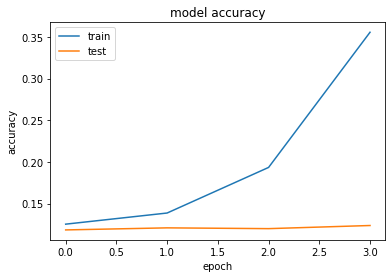

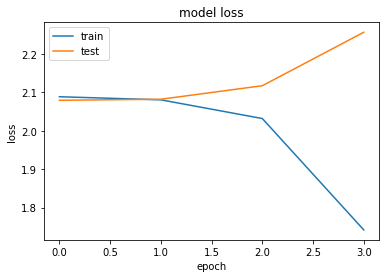

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 17s

 23/266 [=>............................] - ETA: 0s 

 43/266 [===>..........................] - ETA: 0s

 64/266 [======>.......................] - ETA: 0s

 85/266 [========>.....................] - ETA: 0s

107/266 [===========>..................] - ETA: 0s

129/266 [=============>................] - ETA: 0s

150/266 [===============>..............] - ETA: 0s

171/266 [==================>...........] - ETA: 0s

192/266 [====================>.........] - ETA: 0s

214/266 [=======================>......] - ETA: 0s

234/266 [=========================>....] - ETA: 0s

255/266 [===========================>..] - ETA: 0s

266/266 [==============================] - 1s 2ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('25d927c5-84dd-4386-8a4e-3fd63ce3e6d1'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1053,
 'precentage_won': 12.375132212950993,
 'expected_won': 12.5,
 'eraned': '£526,500.00',
 'revenue': '-£324,400.00'}